In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/Shareddrives/Anomaly/

/content/gdrive/Shareddrives/Anomaly


###Creating dataset

In [ ]:
!ls

dataset					  metrics  notebooks  utils
mate-master_old-20230708T024542Z-001.zip  models   results


In [ ]:
!unzip mate-master_old-20230708T024542Z-001.zip

Archive:  mate-master_old-20230708T024542Z-001.zip
  inflating: mate-master_old/utils.py  
  inflating: mate-master_old/multitaskAutoencoders.py  
  inflating: mate-master_old/autoencoder.py  
  inflating: mate-master_old/mtae.py  
  inflating: mate-master_old/dataset.py  
  inflating: mate-master_old/__pycache__/utils.cpython-37.pyc  
  inflating: mate-master_old/__pycache__/dataset.cpython-37.pyc  
  inflating: mate-master_old/__pycache__/autoencoder.cpython-310.pyc  
  inflating: mate-master_old/TODO.md  
  inflating: mate-master_old/data_final.npy  
  inflating: mate-master_old/README.md  
  inflating: mate-master_old/__pycache__/dataset.cpython-310.pyc  
  inflating: mate-master_old/__pycache__/autoencoder.cpython-37.pyc  
  inflating: mate-master_old/__pycache__/utils.cpython-310.pyc  
  inflating: mate-master_old/test_data.npy  
  inflating: mate-master_old/MNIST_6rot.pkl.gz  


In [ ]:
import numpy as np
from tqdm import tqdm
import json
import pandas as pd
import seaborn as sns
#from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

In [ ]:
incart_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/INCART 2-lead Arrhythmia Database.csv')

In [ ]:
incart_df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [ ]:
incart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175729 entries, 0 to 175728
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          175729 non-null  object 
 1   type            175729 non-null  object 
 2   0_pre-RR        175729 non-null  int64  
 3   0_post-RR       175729 non-null  int64  
 4   0_pPeak         175729 non-null  float64
 5   0_tPeak         175729 non-null  float64
 6   0_rPeak         175729 non-null  float64
 7   0_sPeak         175729 non-null  float64
 8   0_qPeak         175729 non-null  float64
 9   0_qrs_interval  175729 non-null  int64  
 10  0_pq_interval   175729 non-null  int64  
 11  0_qt_interval   175729 non-null  int64  
 12  0_st_interval   175729 non-null  int64  
 13  0_qrs_morph0    175729 non-null  float64
 14  0_qrs_morph1    175729 non-null  float64
 15  0_qrs_morph2    175729 non-null  float64
 16  0_qrs_morph3    175729 non-null  float64
 17  0_qrs_morp

In [ ]:
X = incart_df.drop(['record', 'type', '0_pre-RR', '0_post-RR', '0_qrs_interval', '0_pq_interval', '0_qt_interval', '0_st_interval', '1_pre-RR', '1_post-RR', '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval'], axis=1)

In [ ]:
X.head()

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,1_pPeak,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,0.069610,-0.083281,0.614133,-0.392761,0.047159,0.047159,0.146934,0.506485,0.550095,-0.053038,-0.013398,0.204003,0.123922,-0.421342,-0.023370,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,-0.137781,-0.137781,-0.137129,-0.137129,-0.120636,0.096676,0.224041,0.234431,-0.401580,0.081637,0.081637,0.102992,0.191225,0.217544,-0.068248
2,0.109399,0.680528,-0.010649,-0.010649,-0.720620,-0.720620,-0.713241,-0.655214,-0.549735,-0.402562,0.070968,0.046358,0.351806,-0.403456,-0.148539,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,0.176376,0.256431,-0.101098,-0.707525,-0.101098,-0.101098,-0.101098,-0.293285,-0.487062,-0.637563,0.062879,0.202172,0.556317,0.162707,0.046898,0.046898,0.083728,0.279512,0.526785,0.450969
4,0.585577,0.607461,-0.083499,-0.083499,-0.167858,-0.167858,-0.167858,-0.162723,-0.162723,-0.138457,-0.093559,0.264114,0.266151,-0.346567,-0.112552,-0.112552,0.012989,0.091491,0.134004,0.265232


In [ ]:
X.shape

(175729, 20)

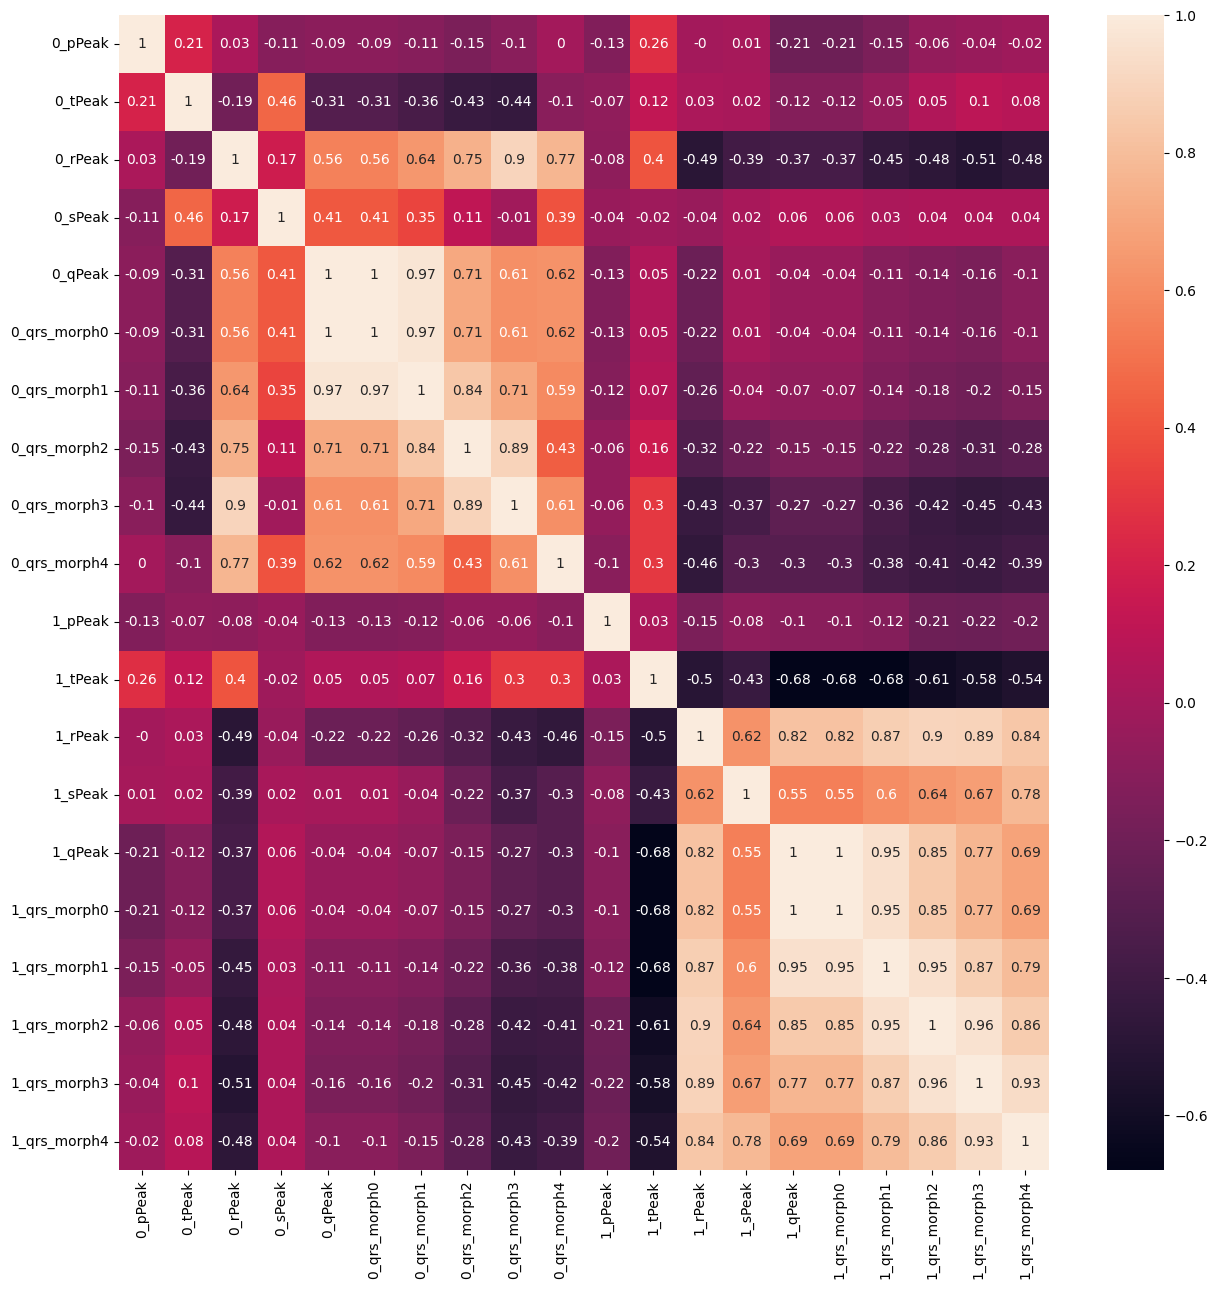

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr().round(2), annot=True);

In [ ]:
y_y = incart_df['type']

In [ ]:
y.unique()

array(['N', 'VEB', 'SVEB', 'F', 'Q'], dtype=object)

In [ ]:
y.loc[y!='N'] = 1
y.loc[y=='N'] = 0

<ipython-input-14-467f31e3d302>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y!='N'] = 1
<ipython-input-14-467f31e3d302>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y=='N'] = 0


In [ ]:
y.unique()

array([0, 1], dtype=object)

In [ ]:
y.value_counts()

0    153546
1     22183
Name: type, dtype: int64

In [ ]:
y_0 = y.index[y==0]

In [ ]:
y_1 = y.index[y==1]

In [ ]:
print(y_1)

Int64Index([     3,     15,     31,     51,     66,     99,    107,    112,
               117,    138,
            ...
            175690, 175695, 175697, 175702, 175704, 175709, 175714, 175716,
            175722, 175724],
           dtype='int64', length=22183)


In [ ]:
X['Label'] = y

In [ ]:
X.head()

,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,0_qrs_morph4,...,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0.069610,-0.083281,0.614133,-0.392761,0.047159,0.047159,0.146934,0.506485,0.550095,-0.053038,...,0.204003,0.123922,-0.421342,-0.023370,-0.023370,-0.011650,0.082608,0.101373,-0.183387,0
1,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,-0.137781,-0.137781,-0.137129,-0.137129,-0.120636,...,0.224041,0.234431,-0.401580,0.081637,0.081637,0.102992,0.191225,0.217544,-0.068248,0
2,0.109399,0.680528,-0.010649,-0.010649,-0.720620,-0.720620,-0.713241,-0.655214,-0.549735,-0.402562,...,0.046358,0.351806,-0.403456,-0.148539,-0.148539,-0.060620,0.081080,0.204400,0.335172,0
3,0.176376,0.256431,-0.101098,-0.707525,-0.101098,-0.101098,-0.101098,-0.293285,-0.487062,-0.637563,...,0.202172,0.556317,0.162707,0.046898,0.046898,0.083728,0.279512,0.526785,0.450969,1
4,0.585577,0.607461,-0.083499,-0.083499,-0.167858,-0.167858,-0.167858,-0.162723,-0.162723,-0.138457,...,0.264114,0.266151,-0.346567,-0.112552,-0.112552,0.012989,0.091491,0.134004,0.265232,0


In [ ]:
X.to_csv('/content/gdrive/Shareddrives/Anomaly/dataset/ECGArrhythmia.csv')

###Model Experiments

In [3]:
import pandas as pd
import numpy as np

In [4]:
far_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/data_far_anom_arrythmia.csv')

In [5]:
far_df.head()

,Unnamed: 0,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,...,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,145,0.274778,0.271494,-0.601867,-0.665821,-0.601867,-0.601867,-0.601867,-0.601867,-0.601867,...,0.165547,0.649832,0.160483,0.038754,0.038754,0.101741,0.366595,0.649832,0.365737,1
1,226,0.136658,0.325595,-0.598443,-0.890521,-0.598443,-0.598443,-0.598443,-0.776747,-0.776747,...,0.051379,0.611229,0.041689,0.020183,0.020183,0.025125,0.132862,0.581184,0.384028,1
2,233,0.127110,0.343536,-0.446307,-0.913501,-0.446307,-0.446307,-0.446307,-0.656465,-0.656465,...,0.038078,0.614055,0.028808,0.015839,0.015839,0.051871,0.299861,0.614055,0.294175,1
3,236,0.135789,0.319992,-0.527644,-0.800750,-0.527644,-0.527644,-0.527644,-0.696380,-0.696380,...,0.085151,0.613390,0.076214,-0.095457,-0.095457,-0.070005,0.015269,0.034273,0.527775,1
4,240,0.094126,0.322597,-0.667449,-0.919237,-0.667449,-0.667449,-0.667449,-0.667449,-0.831700,...,-0.335461,0.654989,-0.481836,0.013582,0.013582,0.184582,0.654989,0.152158,-0.012562,1


In [6]:
far_df.shape

(4119, 22)

In [7]:
far_y = far_df['Label']

In [8]:
far_y_out_test = far_y[0:500].to_numpy()

In [9]:
far_X = far_df.drop(['Unnamed: 0', 'Label'], axis=1)

In [10]:
far_X_out_test = far_X[0:500].to_numpy()

In [11]:
near_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/data_near_anom_arrythmia_V2.csv')

In [12]:
near_df.shape

(486, 22)

In [13]:
near_df.head()

,Unnamed: 0,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,...,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,199,0.254893,0.260995,-0.130274,-0.755287,-0.130274,-0.130274,-0.130274,-0.347186,-0.554726,...,0.184193,0.676615,0.144786,0.003056,0.003056,0.078877,0.336246,0.646880,0.497919,1
1,233,0.127110,0.343536,-0.446307,-0.913501,-0.446307,-0.446307,-0.446307,-0.656465,-0.656465,...,0.038078,0.614055,0.028808,0.015839,0.015839,0.051871,0.299861,0.614055,0.294175,1
2,309,-0.035700,0.409310,0.314426,-0.619147,-0.073340,-0.073340,0.046630,0.254451,0.304905,...,0.170349,0.557171,0.122043,-0.005406,-0.005406,0.050620,0.261764,0.550818,0.387681,1
3,1042,0.217583,0.268833,-0.167985,-0.653522,-0.167985,-0.167985,-0.167985,-0.359125,-0.528360,...,-0.367618,0.551832,-0.492471,0.037391,0.037391,0.054515,0.422529,0.346150,0.109608,1
4,1107,-0.070291,0.149947,-0.585522,-0.994326,-0.585522,-0.585522,-0.585522,-0.784190,-0.784190,...,0.216911,0.653475,0.215727,0.172891,0.172891,0.216856,0.448234,0.652112,0.375726,1


In [14]:
near_df['Label'].unique()

array([1])

In [15]:
near_y = near_df['Label']

In [16]:
near_y_out_test = near_y[0:500].to_numpy()

In [17]:
near_X = near_df.drop(['Unnamed: 0', 'Label'], axis=1)

In [18]:
near_X_out_test = near_X[0:500].to_numpy()

In [19]:
normal_df = pd.read_csv('/content/gdrive/Shareddrives/Anomaly/dataset/data_normal_arrythmia.csv')

In [20]:
normal_df.head()

,Unnamed: 0,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_morph0,0_qrs_morph1,0_qrs_morph2,0_qrs_morph3,...,1_tPeak,1_rPeak,1_sPeak,1_qPeak,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,Label
0,0,0.069610,-0.083281,0.614133,-0.392761,0.047159,0.047159,0.146934,0.506485,0.550095,...,0.204003,0.123922,-0.421342,-0.023370,-0.023370,-0.011650,0.082608,0.101373,-0.183387,0
1,1,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,-0.137781,-0.137781,-0.137129,-0.137129,...,0.224041,0.234431,-0.401580,0.081637,0.081637,0.102992,0.191225,0.217544,-0.068248,0
2,4,0.585577,0.607461,-0.083499,-0.083499,-0.167858,-0.167858,-0.167858,-0.162723,-0.162723,...,0.264114,0.266151,-0.346567,-0.112552,-0.112552,0.012989,0.091491,0.134004,0.265232,0
3,5,0.019637,-0.111671,0.613374,-0.416937,-0.108554,-0.108554,-0.091817,-0.039695,0.415533,...,0.207178,0.308107,-0.340048,-0.088215,-0.088215,-0.001563,0.082968,0.136342,0.308107,0
4,6,-0.156761,0.528148,-0.145137,-0.145137,-0.183749,-0.183749,-0.183749,-0.183749,-0.174279,...,0.233045,0.228644,-0.373486,0.066682,0.066682,0.084804,0.174772,0.224360,-0.011853,0


In [21]:
normal_df.shape

(7041, 22)

In [22]:
normal_y = normal_df['Label']

In [23]:
mask = (normal_df['Label']==0)

In [24]:
normal_y = normal_y[mask]

In [25]:
normal_y.shape

(7041,)

In [26]:
normal_y_train = normal_y[0:5000].to_numpy()

In [27]:
normal_y_test = normal_y[5000:5500].to_numpy()

In [28]:
normal_X = normal_df.drop(['Unnamed: 0', 'Label'], axis=1)

In [29]:
normal_X = normal_X[mask]

In [30]:
normal_X_train = normal_X[0:5000].to_numpy()

In [31]:
normal_X_test = normal_X[5000:5500].to_numpy()

In [32]:
from models.ae import AutoencoderModel
from models.pca import PCAModel
from models.ocsvm import SVMModel
from models.vae import VAEModel
from models.isolationforest import IsolationForestModel
from models.knn import KNNModel
from models.ae_knn import AEKNNModel
from models.ae_knn_2 import AEKNN2Model
# from models.bigan import BiGANModel
# from models.seq2seq import Seq2SeqModel
from utils import eval_utils

In [33]:
def train_pca(in_train, in_test, out_test):
    num_features = 2
    pca = PCAModel()
    pca.train(in_train, in_test, num_features=num_features)

    inlier_scores = pca.compute_anomaly_score_unsupervised(in_test)
    outlier_scores = pca.compute_anomaly_score_unsupervised(out_test)
    #print(inlier_scores)
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="pca", show_plot=False)
    #print(metrics)
    return metrics

In [34]:
pca_far_metrics = train_pca(normal_X_train, normal_X_test, far_X_out_test)

Explained variation per principal component:  0.8490648930109057


In [35]:
print(pca_far_metrics)

{'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f2': 1.0, 'roc': 1.0, 'threshold': 2.708}


In [36]:
pca_near_metrics = train_pca(normal_X_train, normal_X_test, near_X_out_test)

Explained variation per principal component:  0.849064893010905


In [37]:
print(pca_near_metrics)

{'acc': 0.8732251521298174, 'precision': 0.9592875318066157, 'recall': 0.7757201646090535, 'f1': 0.8577929465301479, 'f2': 0.8065896448438168, 'roc': 0.8306419753086419, 'threshold': 2.614}


In [38]:
def train_svm(in_train, in_test, out_test):
    svm_kwargs = {}
    svm_kwargs["kernel"] = "rbf"
    svm_kwargs["gamma"] = 0.5
    svm_kwargs["outlier_frac"] = 0.0001
    svm = SVMModel(**svm_kwargs)
    svm.train(in_train, in_test)

    inlier_scores = svm.compute_anomaly_score(in_test)
    outlier_scores = svm.compute_anomaly_score(out_test)
    #print(inlier_scores)
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="ocsvm", show_plot=False)
    #print(metrics)
    return metrics

In [39]:
svm_far_metrics = train_svm(normal_X_train, normal_X_test, far_X_out_test)

In [40]:
print(svm_far_metrics)

{'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f2': 1.0, 'roc': 1.0, 'threshold': -0.003}


In [41]:
svm_near_metrics = train_svm(normal_X_train, normal_X_test, near_X_out_test)

In [42]:
print(svm_near_metrics)

{'acc': 0.8164300202839757, 'precision': 0.9045092838196287, 'recall': 0.7016460905349794, 'f1': 0.7902665121668598, 'f2': 0.7345971563981041, 'roc': 0.8080041152263374, 'threshold': -0.019}


In [43]:
def train_autoencoder(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    ae_kwargs = {}
    ae_kwargs["latent_dim"] = 2
    ae_kwargs["hidden_layers"] = 1
    ae_kwargs["hidden_dim"] = [7]
    ae_kwargs["epochs"] = 50
    ae_kwargs["batch_size"] = 2
    ae_kwargs["learning_rate"] = 0.001
    # ae_kwargs["model_path"] = ae_model_path
    ae = AutoencoderModel(in_train.shape[1], **ae_kwargs)
    ae.train(in_train, in_test)
    ae.save_model()

    inlier_scores = ae.compute_anomaly_score(in_test, "mae")
    outlier_scores = ae.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="ae", show_plot=False)
    #print(metrics)
    return metrics

In [44]:
ae_far_metrics = train_autoencoder(normal_X_train, normal_X_test, far_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 20)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 7)                 147       
                                                                 
 z_ (Dense)                  (None, 2)                 16        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 2)]               0         
                                                                 
 decoder_hidden_0 (Dense)    (None, 7)      

Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0494 - val_loss: 0.0544
Epoch 2/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0279 - val_loss: 0.0525
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0273 - val_loss: 0.0517
Epoch 4/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0269 - val_loss: 0.0515
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0267 - val_loss: 0.0514
Epoch 6/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0266 - val_loss: 0.0515
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0265 - val_loss: 0.0515
Epoch 8/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0265 - val_loss: 0.0515
Epoch 9/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0264 - val_loss: 0.0514
Epoch 10/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.026

In [45]:
print(ae_far_metrics)

{'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f2': 1.0, 'roc': 1.0, 'threshold': 0.083}


In [46]:
ae_near_metrics = train_autoencoder(normal_X_train, normal_X_test, near_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 20)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 7)                 147       
                                                                 
 z_ (Dense)                  (None, 2)                 16        
                                                                 
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 2)]               0         
                                                                 
 decoder_hidden_0 (Dense)    (None, 7)      

Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0844 - val_loss: 0.0546
Epoch 2/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0322 - val_loss: 0.0526
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0275 - val_loss: 0.0518
Epoch 4/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0270 - val_loss: 0.0518
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0267 - val_loss: 0.0515
Epoch 6/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0266 - val_loss: 0.0516
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0266 - val_loss: 0.0517
Epoch 8/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0265 - val_loss: 0.0516
Epoch 9/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0265 - val_loss: 0.0514
Epoch 10/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.026

In [47]:
print(ae_near_metrics)

{'acc': 0.6673427991886409, 'precision': 0.9388888888888889, 'recall': 0.3477366255144033, 'f1': 0.5075075075075075, 'f2': 0.39783427495291906, 'roc': 0.5097736625514404, 'threshold': 0.072}


In [48]:
def train_vae(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    vae_kwargs = {}
    vae_kwargs["latent_dim"] = 2
    vae_kwargs["hidden_dim"] = [15, 7]
    vae_kwargs["epochs"] = 50
    vae_kwargs["batch_size"] = 8
    # vae_kwargs["model_path"] = ae_model_path
    vae = VAEModel(in_train.shape[1], **vae_kwargs)
    vae.train(in_train, in_test)
    vae.save_model()

    inlier_scores = vae.compute_anomaly_score(in_test, "mae")
    outlier_scores = vae.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="vae", show_plot=False)
    # print(metrics)
    return metrics

In [49]:
vae_far_metrics = train_vae(normal_X_train, normal_X_test, far_X_out_test)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder_hidden_0 (Dense)       (None, 15)           315         ['encoder_input[0][0]']          
                                                                                                  
 encoder_hidden_1 (Dense)       (None, 7)            112         ['encoder_hidden_0[0][0]']       
                                                                                                  
 z_mean (Dense)                 (None, 2)            16          ['encoder_hidden_1[0][0]']       
                                                                                            

Epoch 1/50
625/625 [==============================] - 2s 2ms/step - loss: 1.8260 - val_loss: 1.2347
Epoch 2/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9647 - val_loss: 1.1799
Epoch 3/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9525 - val_loss: 1.1990
Epoch 4/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9498 - val_loss: 1.2259
Epoch 5/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9468 - val_loss: 1.2045
Epoch 6/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9492 - val_loss: 1.2317
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9468 - val_loss: 1.1949
Epoch 8/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9461 - val_loss: 1.2333
Epoch 9/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9459 - val_loss: 1.2058
Epoch 10/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9458 - val_loss: 1.2271

In [50]:
print(vae_far_metrics)

{'acc': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'f2': 1.0, 'roc': 1.0, 'threshold': 0.1}


In [51]:
vae_near_metrics = train_vae(normal_X_train, normal_X_test, near_X_out_test)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder_hidden_0 (Dense)       (None, 15)           315         ['encoder_input[0][0]']          
                                                                                                  
 encoder_hidden_1 (Dense)       (None, 7)            112         ['encoder_hidden_0[0][0]']       
                                                                                                  
 z_mean (Dense)                 (None, 2)            16          ['encoder_hidden_1[0][0]']       
                                                                                            

Epoch 1/50
625/625 [==============================] - 2s 2ms/step - loss: 1.9762 - val_loss: 1.1913
Epoch 2/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9618 - val_loss: 1.1714
Epoch 3/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9515 - val_loss: 1.1857
Epoch 4/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9482 - val_loss: 1.2371
Epoch 5/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9474 - val_loss: 1.1935
Epoch 6/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9472 - val_loss: 1.2200
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9468 - val_loss: 1.1930
Epoch 8/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9464 - val_loss: 1.2273
Epoch 9/50
625/625 [==============================] - 1s 2ms/step - loss: 0.9463 - val_loss: 1.2061
Epoch 10/50
625/625 [==============================] - 1s 1ms/step - loss: 0.9458 - val_loss: 1.2281

In [52]:
print(vae_near_metrics)

{'acc': 0.7190669371196755, 'precision': 0.9098039215686274, 'recall': 0.4773662551440329, 'f1': 0.6261808367071525, 'f2': 0.527512505684402, 'roc': 0.6471111111111112, 'threshold': 0.082}


In [53]:
def train_isolationforest(in_train, in_test, out_test):
    contamination = 'auto'
    ifm = IsolationForestModel(contamination)
    ifm.train(in_train, in_test)

    inlier_scores = ifm.compute_anomaly_score(in_test)
    outlier_scores = ifm.compute_anomaly_score(out_test)
    #print(inlier_scores)
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="isolationforest", show_plot=False)
    #print(metrics)
    return metrics

In [54]:
ifm_far_metrics = train_isolationforest(normal_X_train, normal_X_test, far_X_out_test)

In [55]:
print(ifm_far_metrics)

{'acc': 0.999, 'precision': 0.998003992015968, 'recall': 1.0, 'f1': 0.9990009990009989, 'f2': 0.9996001599360256, 'roc': 1.0, 'threshold': 0.075}


In [56]:
ifm_near_metrics = train_isolationforest(normal_X_train, normal_X_test, near_X_out_test)

In [57]:
print(ifm_near_metrics)

{'acc': 0.9158215010141988, 'precision': 0.9038076152304609, 'recall': 0.9279835390946503, 'f1': 0.915736040609137, 'f2': 0.9230454359394189, 'roc': 0.973164609053498, 'threshold': 0.028}


In [58]:
def train_knn(in_train, in_test, out_test):
    n = 3
    algorithm = 'auto'
    knn = KNNModel(n, algorithm)
    knn.train(in_train, in_test)

    inlier_scores = knn.compute_anomaly_score(in_test)
    outlier_scores = knn.compute_anomaly_score(out_test)
    #print(inlier_scores.shape, type(inlier_scores))
    #print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="knn", show_plot=False)
    #print(metrics)
    return metrics

In [59]:
knn_far_metrics = train_knn(normal_X_train, normal_X_test, far_X_out_test)

In [60]:
print(knn_far_metrics)

{'acc': 0.999, 'precision': 0.998003992015968, 'recall': 1.0, 'f1': 0.9990009990009989, 'f2': 0.9996001599360256, 'roc': 1.0, 'threshold': 0.221}


In [61]:
knn_near_metrics = train_knn(normal_X_train, normal_X_test, near_X_out_test)

In [62]:
print(knn_near_metrics)

{'acc': 0.9929006085192698, 'precision': 0.9938144329896907, 'recall': 0.9917695473251029, 'f1': 0.9927909371781669, 'f2': 0.9921778509674763, 'roc': 0.9987489711934157, 'threshold': 0.17}


In [63]:
def train_AEKNN(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    ae_kwargs = {}
    ae_kwargs["latent_dim"] = 3
    ae_kwargs["hidden_layers"] = 2
    ae_kwargs["hidden_dim"] = [15, 7]
    ae_kwargs["epochs"] = 50
    ae_kwargs["batch_size"] = 2
    ae_kwargs["learning_rate"] = 0.001
    # ae_kwargs["model_path"] = ae_model_path
    aeknn = AEKNNModel(in_train.shape[1], **ae_kwargs)
    aeknn.train(in_train, in_test)
    aeknn.save_model()

    inlier_scores = aeknn.compute_anomaly_score(in_test, "mae")
    outlier_scores = aeknn.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="aeknn", show_plot=False)
    #print(metrics)
    return metrics

In [64]:
aeknn_far_metrics = train_AEKNN(normal_X_train, normal_X_test, far_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 20)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 15)                315       
                                                                 
 encoder_hidden_1 (Dense)    (None, 7)                 112       
                                                                 
 z_ (Dense)                  (None, 3)                 24        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 3)]    

Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0428 - val_loss: 0.0523
Epoch 2/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0266 - val_loss: 0.0505
Epoch 3/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0260 - val_loss: 0.0504
Epoch 4/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0258 - val_loss: 0.0506
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0256 - val_loss: 0.0504
Epoch 6/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0256 - val_loss: 0.0496
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0254 - val_loss: 0.0494
Epoch 8/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0253 - val_loss: 0.0494
Epoch 9/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0252 - val_loss: 0.0494
Epoch 10/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.025

In [65]:
print(aeknn_far_metrics)

{'acc': 0.837, 'precision': 0.88558352402746, 'recall': 0.774, 'f1': 0.8260405549626467, 'f2': 0.7940090274928191, 'roc': 0.898964, 'threshold': 0.205}


In [66]:
aeknn_near_metrics = train_AEKNN(normal_X_train, normal_X_test, near_X_out_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 20)]              0         
                                                                 
 encoder_hidden_0 (Dense)    (None, 15)                315       
                                                                 
 encoder_hidden_1 (Dense)    (None, 7)                 112       
                                                                 
 z_ (Dense)                  (None, 3)                 24        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_ (InputLayer)             [(None, 3)]    

Epoch 1/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0420 - val_loss: 0.0507
Epoch 2/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0267 - val_loss: 0.0500
Epoch 3/50
2500/2500 [==============================] - 4s 1ms/step - loss: 0.0263 - val_loss: 0.0497
Epoch 4/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0260 - val_loss: 0.0498
Epoch 5/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0258 - val_loss: 0.0495
Epoch 6/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0257 - val_loss: 0.0494
Epoch 7/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0256 - val_loss: 0.0494
Epoch 8/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0255 - val_loss: 0.0494
Epoch 9/50
2500/2500 [==============================] - 3s 1ms/step - loss: 0.0254 - val_loss: 0.0494
Epoch 10/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.025

In [67]:
print(aeknn_near_metrics)

{'acc': 0.9827586206896551, 'precision': 0.9916142557651991, 'recall': 0.9732510288065843, 'f1': 0.9823468328141224, 'f2': 0.9768690623709211, 'roc': 0.9972592592592592, 'threshold': 0.249}


In [68]:
def train_AEKNN2(in_train, in_test, out_test):
    # Instantiate and Train Autoencoder
    ae_kwargs = {}
    ae_kwargs["latent_dim"] = 3
    ae_kwargs["hidden_layers"] = 2
    ae_kwargs["hidden_dim"] = [15, 7]
    ae_kwargs["epochs"] = 50
    ae_kwargs["batch_size"] = 2
    ae_kwargs["learning_rate"] = 0.001
    # ae_kwargs["model_path"] = ae_model_path
    aeknn = AEKNN2Model(in_train.shape[1], **ae_kwargs)
    aeknn.train(in_train, in_test)
    aeknn.save_model()

    inlier_scores = aeknn.compute_anomaly_score(in_test, "mae")
    outlier_scores = aeknn.compute_anomaly_score(out_test, "mae")
    # print(inlier_scores)
    # print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="aeknn", show_plot=False)
    #print(metrics)
    return metrics

In [69]:
def train_bigan():
    bigan_kwargs = {}
    bigan_kwargs["latent_dim"] = 2
    bigan_kwargs["dense_dim"] = 128
    bigan_kwargs["epochs"] = 15
    bigan_kwargs["batch_size"] = 256
    bigan_kwargs["learning_rate"] = 0.01
    input_shape = (in_train.shape[1], )
    bigan = BiGANModel(input_shape, **bigan_kwargs)
    bigan.train(in_train, in_test)
    bigan.save_model()
    inlier_scores = bigan.compute_anomaly_score(in_test)
    outlier_scores = bigan.compute_anomaly_score(out_test)
    print(inlier_scores)
    print(outlier_scores)
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="bigan", show_plot=False)
    print(metrics)
    return metrics


def train_seq2seq():
    # seq2seq models require a dim 3 input matrix (rows, timesteps, num_features )
    in_train_x, in_test_x, out_test_x = np.expand_dims(
        in_train, axis=2), np.expand_dims(in_test, axis=2),  np.expand_dims(out_test, axis=2)

    seq2seq_kwargs = {}
    seq2seq_kwargs["encoder_dim"] = [10]
    seq2seq_kwargs["decoder_dim"] = [20]
    seq2seq_kwargs["epochs"] = 40
    seq2seq_kwargs["batch_size"] = 256
    seq2seq_kwargs["learning_rate"] = 0.01
    n_features = 1  # single value per feature
    seq2seq = Seq2SeqModel(n_features, **seq2seq_kwargs)
    seq2seq.train(in_train_x, in_test_x)
    seq2seq.save_model()

    # seq2seq.load_model()
    inlier_scores = seq2seq.compute_anomaly_score(
        in_test_x[np.random.randint(100, size=400), :])
    outlier_scores = seq2seq.compute_anomaly_score(
        out_test_x[np.random.randint(100, size=80), :])

    print(inlier_scores[:5])
    print(outlier_scores[:5])
    metrics = eval_utils.evaluate_model(
        inlier_scores, outlier_scores, model_name="seq2seq", show_plot=False)
    print(metrics)
    return metrics